In [2]:
import pandas as pd

In [25]:
train = pd.read_csv(r'train.csv')

In [4]:
train.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [5]:
y = train['label']

In [6]:
train = train.drop(['label'],axis=1)

In [7]:
train.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [8]:
train.shape

(20800, 4)

In [9]:
train = train.dropna()

In [10]:
train.shape

(18285, 4)

In [11]:
train_copy = train.copy()

In [12]:
train_copy.reset_index(inplace=True)

In [13]:
train_copy.text[4]

'Print \nAn Iranian woman has been sentenced to six years in prison after Iran’s Revolutionary Guard searched her home and found a notebook that contained a fictional story she’d written about a woman who was stoned to death, according to the Eurasia Review . \nGolrokh Ebrahimi Iraee, 35, is the wife of political prisoner Arash Sadeghi, 36, who is serving a 19-year prison sentence for being a human rights activist, the publication reported. \n“When the intelligence unit of the Revolutionary Guards came to arrest her husband, they raided their apartment – without a warrant – and found drafts of stories that Ebrahimi Iraee had written,” the article stated. \n“One of the confiscated drafts was a story about stoning women to death for adultery – never published, never presented to anyone,” the article stated. “The narrative followed the story of a protagonist that watched a movie about stoning of women under Islamic law for adultery.'

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm

stemmer = PorterStemmer()
corpus = []
for sentence in tqdm(train_copy.text):
    sentence = re.sub('[^a-zA-Z]',' ',sentence)
    sentence = sentence.lower()
    words = sentence.split()
    
    temp = [stemmer.stem(word) for word in words if word not in stopwords.words("english")] 
    corpus.append(" ".join(temp))
    

100%|██████████████████████████████████████████████████████████████████████████| 18285/18285 [2:54:41<00:00,  1.74it/s]


In [15]:
corpus[:2]

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

In [16]:
len(corpus)

18285

In [17]:
with open('corpus.txt','w') as f:
    for sentence in corpus:
        f.write(f"{sentence}\n")

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 10000, ngram_range=(1,3))
train_vect = vect.fit_transform(corpus).toarray()

In [19]:
train_vect.shape

(18285, 10000)

In [38]:
y=train.dropna().label

In [39]:
len(y)

18285

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_vect,y,test_size=0.3,random_state=0)

In [42]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(12799, 10000) (5486, 10000)
(12799,) (5486,)


In [45]:
len(vect.get_feature_names())

10000

In [46]:
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [47]:
df = pd.DataFrame(train_vect,columns=vect.get_feature_names())

In [48]:
df.head()

,aaron,aaron klein,abandon,abba,abbott,abc,abc news,abduct,abdullah,abe,...,zero,zero hedg,zika,zika viru,zionist,zone,zone syria,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = MultinomialNB()

In [57]:
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
y_pred = model.predict(x_test)

In [59]:
accuracy_score(y_pred, y_test)

0.917243893547211

In [60]:
cm = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization


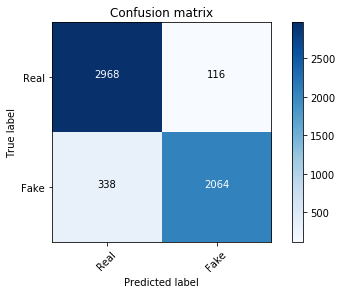

In [70]:
plot_confusion_matrix(cm, classes = ['Real','Fake'])

## With Hyperparameter Tuning

In [72]:
classifier = MultinomialNB(alpha=1)
previous_score = 0
for alpha in np.arange(0,1,0.1):
    model = MultinomialNB(alpha=alpha)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = model
    print(f"for Alpha:{alpha} the score is {score}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


for Alpha:0.0 the score is 0.9281808239154211
for Alpha:0.1 the score is 0.9232592052497266
for Alpha:0.2 the score is 0.9225300765585126
for Alpha:0.30000000000000004 the score is 0.9218009478672986
for Alpha:0.4 the score is 0.9208895370032811
for Alpha:0.5 the score is 0.9201604083120671
for Alpha:0.6000000000000001 the score is 0.9199781261392636
for Alpha:0.7000000000000001 the score is 0.9190667152752461
for Alpha:0.8 the score is 0.9181553044112286
for Alpha:0.9 the score is 0.9177907400656216


In [74]:
vect.get_feature_names()

['aaron',
 'aaron klein',
 'abandon',
 'abba',
 'abbott',
 'abc',
 'abc news',
 'abduct',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil',
 'abl',
 'abl get',
 'abnorm',
 'aboard',
 'abolish',
 'aborigin',
 'abort',
 'abort right',
 'abraham',
 'abram',
 'abroad',
 'abruptli',
 'absenc',
 'absent',
 'absente',
 'absolut',
 'absorb',
 'abstract',
 'absurd',
 'abu',
 'abund',
 'abus',
 'academ',
 'academi',
 'academi award',
 'academia',
 'acceler',
 'accent',
 'accept',
 'access',
 'access pipelin',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accord mr',
 'accord new',
 'accord one',
 'accord peopl',
 'accord report',
 'accord two',
 'accordingli',
 'account',
 'accumul',
 'accur',
 'accuraci',
 'accus',
 'accus mr',
 'accustom',
 'achiev',
 'acid',
 'acknowledg',
 'aclu',
 'acosta',
 'acquir',
 'acquisit',
 'acquit',
 'acr',
 'across',
 'across america',
 'across border',
 'across countri',
 'across europ',
 'across nation',


In [75]:
classifier.coef_[0]

array([ -9.75839995, -10.74426559,  -9.19522048, ..., -10.70005767,
        -8.69036771, -10.07693211])

In [77]:
sorted(zip(classifier.coef_[0],vect.get_feature_names()), reverse=True)[:20]

[(-5.609727727171732, 'clinton'),
 (-5.729668688393692, 'trump'),
 (-5.905984036410563, 'hillari'),
 (-6.146362602609647, 'us'),
 (-6.15934165563366, 'elect'),
 (-6.358115408812658, 'peopl'),
 (-6.376177044955376, 'vote'),
 (-6.411387695956951, 'state'),
 (-6.440311298109522, 'email'),
 (-6.456016917181128, 'one'),
 (-6.521390754984457, 'hillari clinton'),
 (-6.529160491108484, 'fbi'),
 (-6.544678594916675, 'would'),
 (-6.5573822170176, 'like'),
 (-6.5873770752427365, 'american'),
 (-6.621365195315776, 'time'),
 (-6.621970326214275, 'war'),
 (-6.645601742832617, 'world'),
 (-6.677665297772914, 'year'),
 (-6.697527094050333, 'presid')]

In [83]:
from sklearn.feature_extraction.text import HashingVectorizer
hs_vectorizer=HashingVectorizer(n_features=5000)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [84]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
